In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from EntityDataset import TrainDataset
from LoadData import LoadData

2025-02-17 00:32:46 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-02-17 00:32:47 INFO: Downloaded file to /Users/sankalpa/stanza_resources/resources.json
2025-02-17 00:32:47 WARNING: Language en package default expects mwt, which has been added
2025-02-17 00:32:48 INFO: Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| mwt       | combined                  |
| pos       | combined_charlm           |
| lemma     | combined_nocharlm         |
| coref     | udcoref_xlm-roberta-lora  |
| depparse  | combined_charlm           |
| ner       | ontonotes-ww-multi_charlm |

2025-02-17 00:32:48 INFO: Using device: cpu
2025-02-17 00:32:48 INFO: Loading: tokenize
2025-02-17 00:32:48 INFO: Loading: mwt
2025-02-17 00:32:48 INFO: Loading: pos
2025-02-17 00:32:50 INFO: Loading: lemma
2025-02-17 00:32:51 INFO: Loading: coref
2025-02-17 00:32:54 INFO: Loading: depparse
2025-02-17 00:32:54 INFO: Loading: ner
2025-02-17 00:32:57 INFO: Done 

2025-02-17 05:52:24 INFO: Downloaded file to /Users/sankalpa/stanza_resources/resources.json
2025-02-17 05:52:26 INFO: Loading these models for language: ru (Russian):
| Processor | Package                  |
----------------------------------------
| tokenize  | syntagrus                |
| pos       | syntagrus_charlm         |
| lemma     | syntagrus_nocharlm       |
| coref     | udcoref_xlm-roberta-lora |
| depparse  | syntagrus_charlm         |
| ner       | wikiner                  |

2025-02-17 05:52:26 INFO: Using device: cpu
2025-02-17 05:52:26 INFO: Loading: tokenize
2025-02-17 05:52:26 INFO: Loading: pos
2025-02-17 05:52:29 INFO: Loading: lemma
2025-02-17 05:52:31 INFO: Loading: coref
2025-02-17 05:52:34 INFO: Loading: depparse
2025-02-17 05:52:34 INFO: Loading: ner
2025-02-17 05:52:40 INFO: Done loading processors!


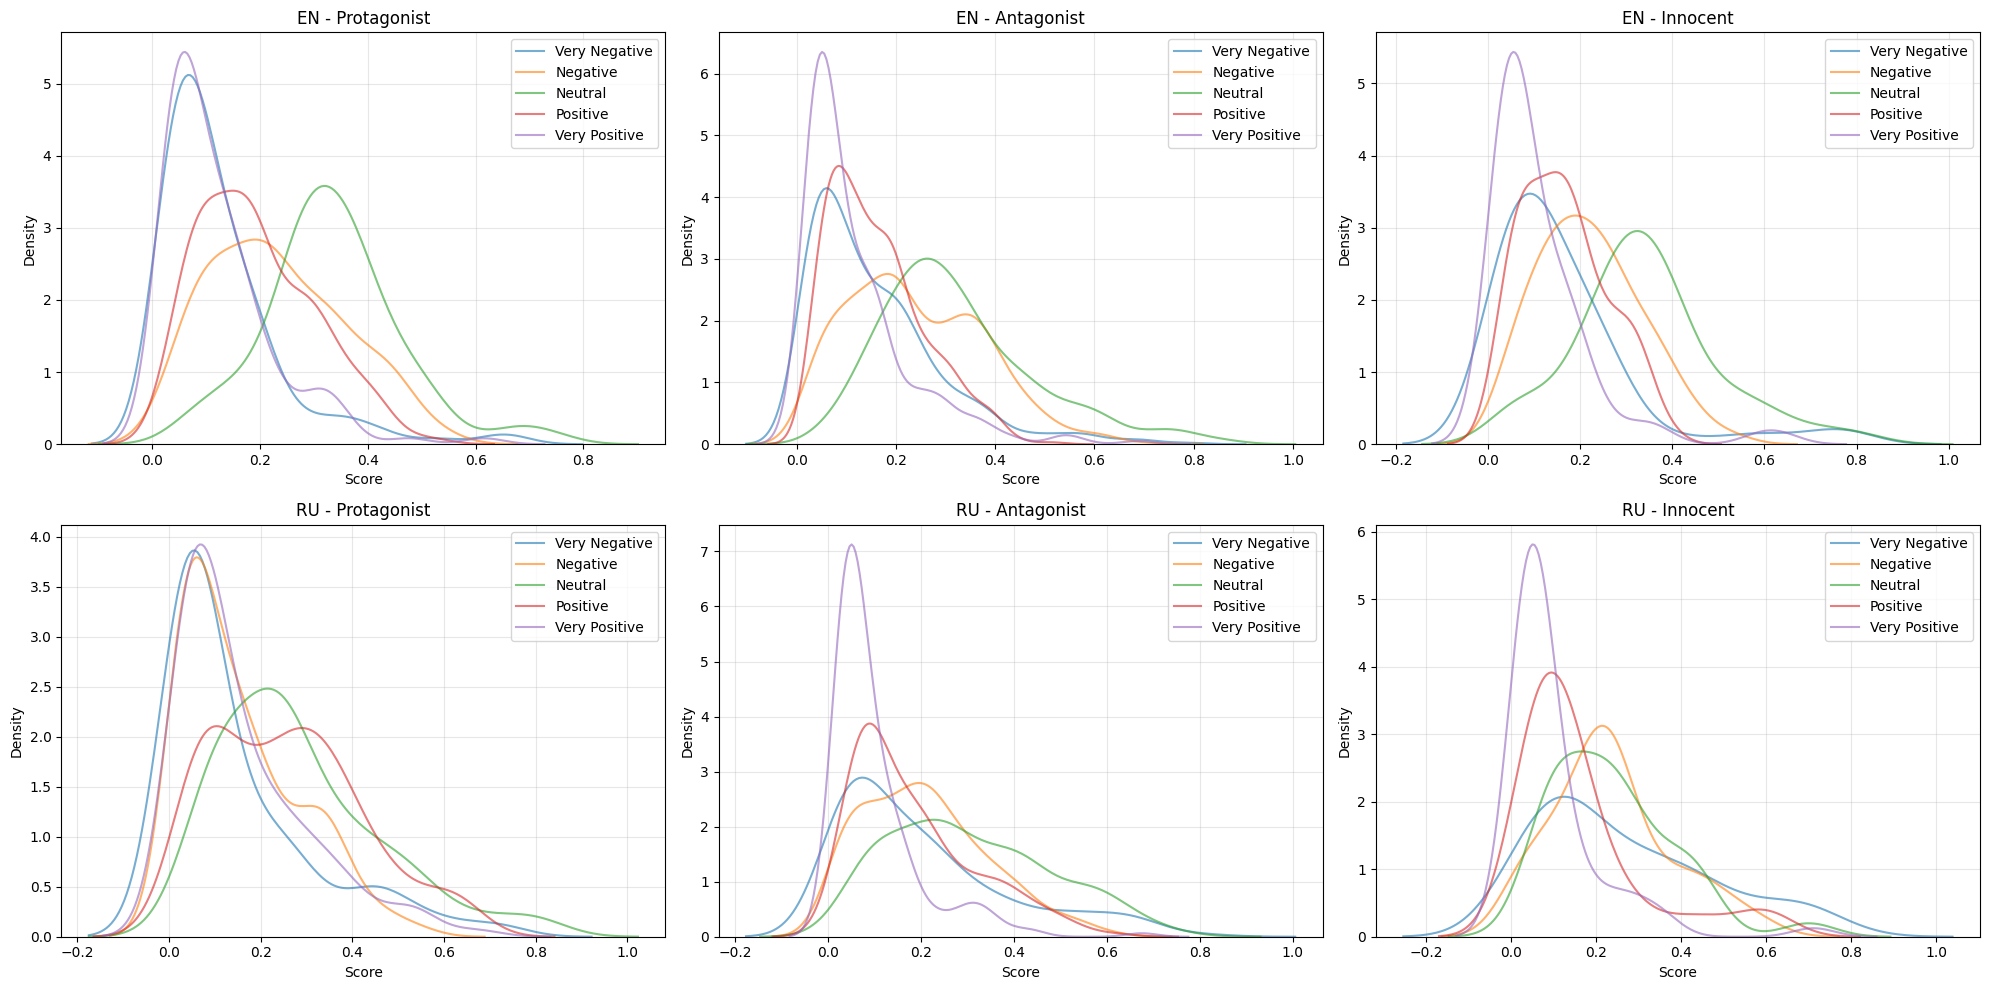

In [ ]:
# Create a figure with subplots for each role and language
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sentiments = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]
main_roles = ["Protagonist", "Antagonist", "Innocent"]
languages = ["EN", "RU"]
base_dir = "train"
txt_file = "subtask-1-annotations.txt"

ld = LoadData()

for lang_idx, lang in enumerate(languages):
    # Load data for each language
    data = ld.load_data(base_dir, txt_file, [lang])
    train_dataset = TrainDataset(data, base_dir, language=lang, return_sentiment=True)
    
    # Process data
    sent_sents = []
    roles = []
    for i in range(len(train_dataset)):
        item = train_dataset[i]
        sent_sents.append(item['sent_sent'])
        roles.append(item['main_role'])
    
    # Create DataFrame
    sent_sents_array = np.array(sent_sents).squeeze(axis=1)
    sentence_df = pd.DataFrame(sent_sents_array, columns=sentiments)
    sentence_df['main_role'] = roles
    
    # Plot for each role
    for role_idx, role in enumerate(main_roles):
        role_df = sentence_df[sentence_df['main_role'] == role]
        
        # Plot for each sentiment
        for sentiment in sentiments:
            sns.kdeplot(data=role_df[sentiment], label=sentiment, alpha=0.6, ax=axes[lang_idx, role_idx])
        
        axes[lang_idx, role_idx].set_title(f'{lang} - {role}')
        axes[lang_idx, role_idx].set_xlabel('Score')
        axes[lang_idx, role_idx].set_ylabel('Density')
        axes[lang_idx, role_idx].legend()
        axes[lang_idx, role_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()